# House Loan Data Analysis

### DESCRIPTION

For safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using the historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

Objective: Create a model that predicts whether or not an applicant will be able to repay a loan using historical data.

In [23]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [24]:
# 1. Load the dataset 
loan_data = pd.read_csv('loan_data (1).csv')

In [25]:
loan_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
loan_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [27]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [28]:
# 2. Find any NULL values
loan_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

There are so many null values available here. SO we have to perform missing value treatment

In [29]:
total_missing_value_count = loan_data.isna().sum().sum()
print(total_missing_value_count)

9152465


In [30]:
loan_data_dropped = loan_data.dropna(axis=0,how = 'any')
loan_data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 71 to 307482
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 8.1+ MB


#### 3. Print percentage of default to payer of the dataset for the TARGET column

In [32]:
percentage = (loan_data['TARGET'].value_counts() / len(loan_data) * 100).loc[1]
print(f"Percentage of default to payer: {percentage:.2f}%")

Percentage of default to payer: 8.07%


#### 4. Check data is balanced or not

In [33]:
loan_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

We can see that data is highly imbalanced. So we have to perform Randomover sampling technique

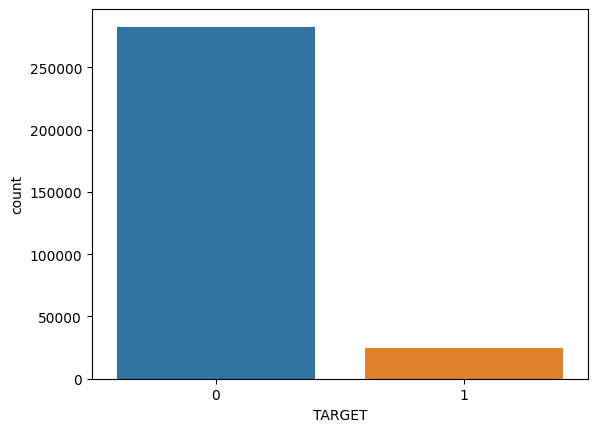

In [34]:
#Plot the imbalanced dataset
import seaborn as sns
sns.countplot(data=loan_data, x='TARGET')
plt.show()

#### Missing Value Treatment

In [35]:
loan_data.dropna(axis=0)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,Cash loans,F,Y,Y,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


Here, So many Categorical columns present in the data set. So we have to perform OrdinalEncoder and alongwith treat the missing values

In [38]:
non_numeric_columns = loan_data.select_dtypes(include='object').columns
print(non_numeric_columns)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


#### 6.Encode the columns that is required for the model

In [52]:
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

from sklearn.impute import SimpleImputer
# Create an imputer object
imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values in the categorical columns
loan_data_encoded[categorical_columns] = imputer.fit_transform(loan_data_encoded[categorical_columns])


ordinal_encoder = OrdinalEncoder()
loan_data_encoded[categorical_columns] = ordinal_encoder.fit_transform(loan_data_encoded[categorical_columns])
print(loan_data_encoded[categorical_columns])

        NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                      0.0          1.0           0.0              1.0   
1                      0.0          0.0           0.0              0.0   
2                      1.0          1.0           1.0              1.0   
3                      0.0          0.0           0.0              1.0   
4                      0.0          1.0           0.0              1.0   
...                    ...          ...           ...              ...   
307506                 0.0          1.0           0.0              0.0   
307507                 0.0          0.0           0.0              1.0   
307508                 0.0          0.0           0.0              1.0   
307509                 0.0          0.0           0.0              1.0   
307510                 0.0          0.0           0.0              0.0   

        NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0                   6.0               7.0    

here, Ordinal encoder performed successfully

In [62]:
loan_data_encoded.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [73]:
loan_data_encoded.dropna(inplace = True)

In [74]:
# Split the encoded data into x and y variables
x = loan_data_encoded.drop(['SK_ID_CURR' , 'TARGET'], axis=1)
y = loan_data_encoded['TARGET']

In [75]:
x

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,0.0,1.0,1.0,1.0,0,103500.0,573628.5,24435.0,463500.0,6.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,0.0,0.0,1.0,1.0,1,202500.0,260725.5,16789.5,198000.0,1.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
143,0.0,0.0,1.0,1.0,0,175500.0,1293502.5,35568.0,1129500.0,1.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
152,0.0,0.0,1.0,0.0,0,202500.0,675000.0,53329.5,675000.0,6.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,0.0,1.0,1.0,0.0,0,162000.0,263686.5,24781.5,238500.0,6.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307359,0.0,0.0,1.0,1.0,1,99000.0,675000.0,21906.0,675000.0,1.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307363,0.0,0.0,1.0,1.0,0,29250.0,663093.0,21519.0,553500.0,6.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
307407,0.0,0.0,1.0,1.0,1,261000.0,711454.5,47673.0,643500.0,5.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,0.0,0.0,1.0,1.0,0,94500.0,270000.0,15075.0,270000.0,6.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [86]:
x

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,0.0,1.0,1.0,1.0,0,103500.0,573628.5,24435.0,463500.0,6.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,0.0,0.0,1.0,1.0,1,202500.0,260725.5,16789.5,198000.0,1.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
143,0.0,0.0,1.0,1.0,0,175500.0,1293502.5,35568.0,1129500.0,1.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
152,0.0,0.0,1.0,0.0,0,202500.0,675000.0,53329.5,675000.0,6.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,0.0,1.0,1.0,0.0,0,162000.0,263686.5,24781.5,238500.0,6.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307359,0.0,0.0,1.0,1.0,1,99000.0,675000.0,21906.0,675000.0,1.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307363,0.0,0.0,1.0,1.0,0,29250.0,663093.0,21519.0,553500.0,6.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
307407,0.0,0.0,1.0,1.0,1,261000.0,711454.5,47673.0,643500.0,5.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,0.0,0.0,1.0,1.0,0,94500.0,270000.0,15075.0,270000.0,6.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


Now, there is no missing value present and encoding also performed

#### Model performed with Imbalanced data

In [76]:
from sklearn.model_selection import train_test_split # Import train_test_split function

In [77]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # 80% training and 20% test

In [78]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

X_train_std = st.fit_transform(X_train)
X_test_std = st.transform(X_test)

In [79]:
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense,BatchNormalization
from tensorflow.keras.metrics import Precision,Recall
from livelossplot import PlotLossesKerasTF

In [80]:
model = Sequential()
model.add(Input(shape=(120,)))
model.add(Dense(20,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy',Precision(),Recall()])

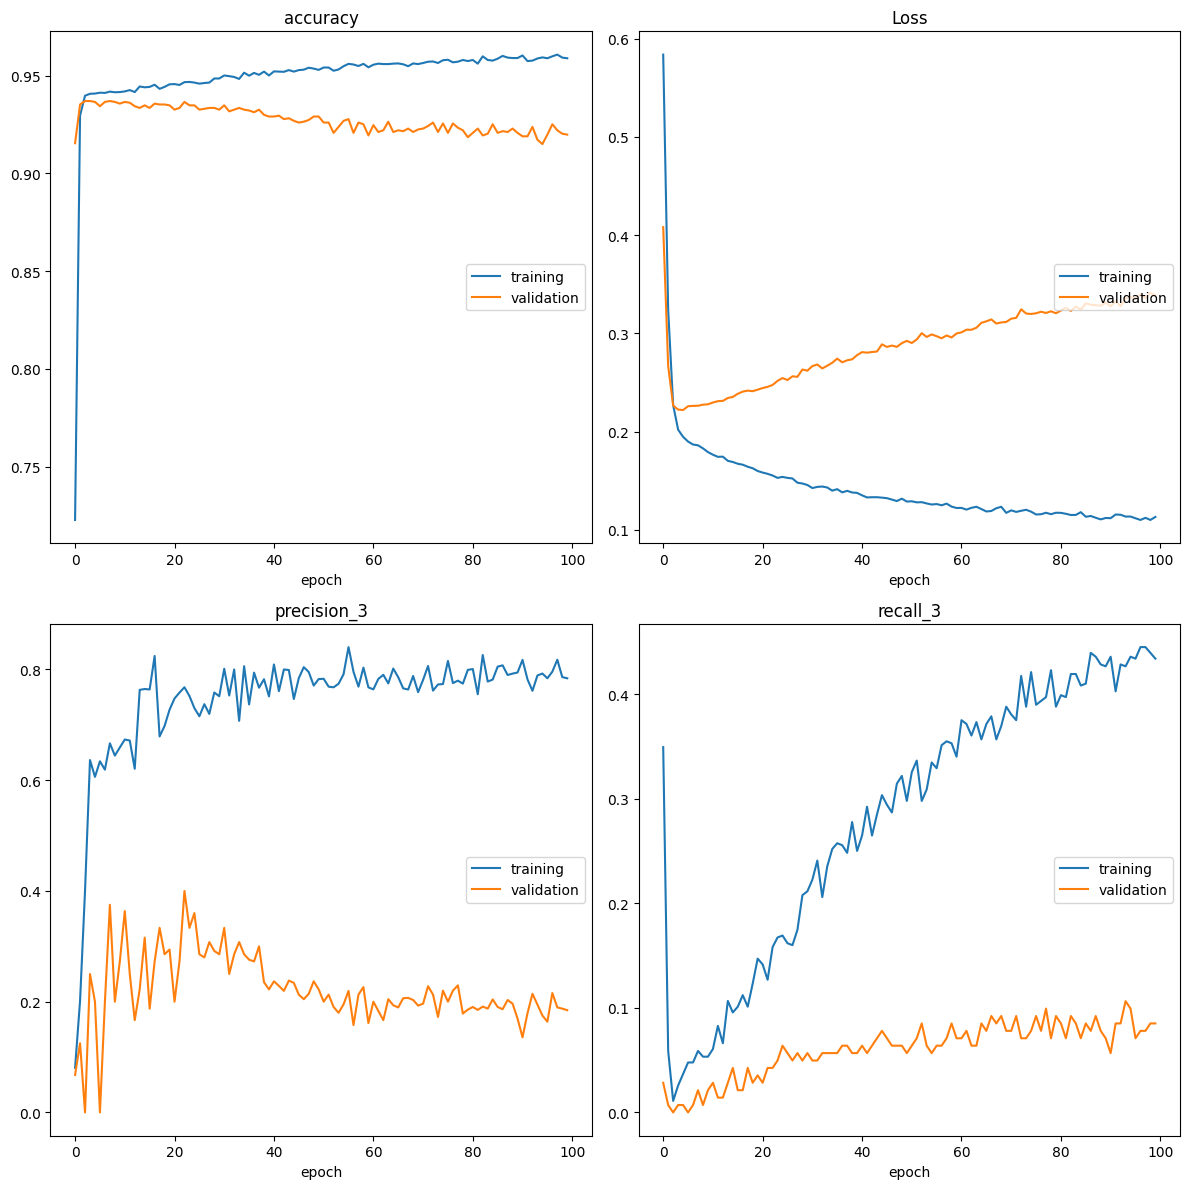

accuracy
	training         	 (min:    0.723, max:    0.961, cur:    0.959)
	validation       	 (min:    0.915, max:    0.937, cur:    0.920)
Loss
	training         	 (min:    0.110, max:    0.584, cur:    0.113)
	validation       	 (min:    0.222, max:    0.408, cur:    0.339)
precision_3
	training         	 (min:    0.081, max:    0.840, cur:    0.784)
	validation       	 (min:    0.000, max:    0.400, cur:    0.185)
recall_3
	training         	 (min:    0.011, max:    0.445, cur:    0.434)
	validation       	 (min:    0.000, max:    0.106, cur:    0.085)
142/142 [==============================] - 1s 10ms/step - loss: 0.1131 - accuracy: 0.9589 - precision_3: 0.7841 - recall_3: 0.4338 - val_loss: 0.3389 - val_accuracy: 0.9199 - val_precision_3: 0.1846 - val_recall_3: 0.0851


In [81]:
model.fit(X_train_std,y_train,epochs = 100, batch_size = 64,validation_data = (X_test_std,y_test),callbacks = [PlotLossesKerasTF()])

Here, we can see that model is not performed well in precision and recall with imbalanced data. So now we will overcome this issue with RandomOverSampling technique.

### RandomOverSampling for Imbalanced data

In [87]:
from imblearn.over_sampling import RandomOverSampler
ro=RandomOverSampler()
x_train_oversampled,y_train_oversampled=ro.fit_resample(x,y)

In [88]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_oversampled)))


Original dataset shape Counter({0: 10666, 1: 685})
Resampled dataset shape Counter({0: 10666, 1: 10666})


In [89]:
print(x_train_oversampled.shape)
print(y_train_oversampled.shape)

(21332, 120)
(21332,)


In [90]:
# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split( x_train_oversampled,y_train_oversampled, test_size=0.2, random_state=2)

In [91]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std=scaler.fit_transform(x_test)

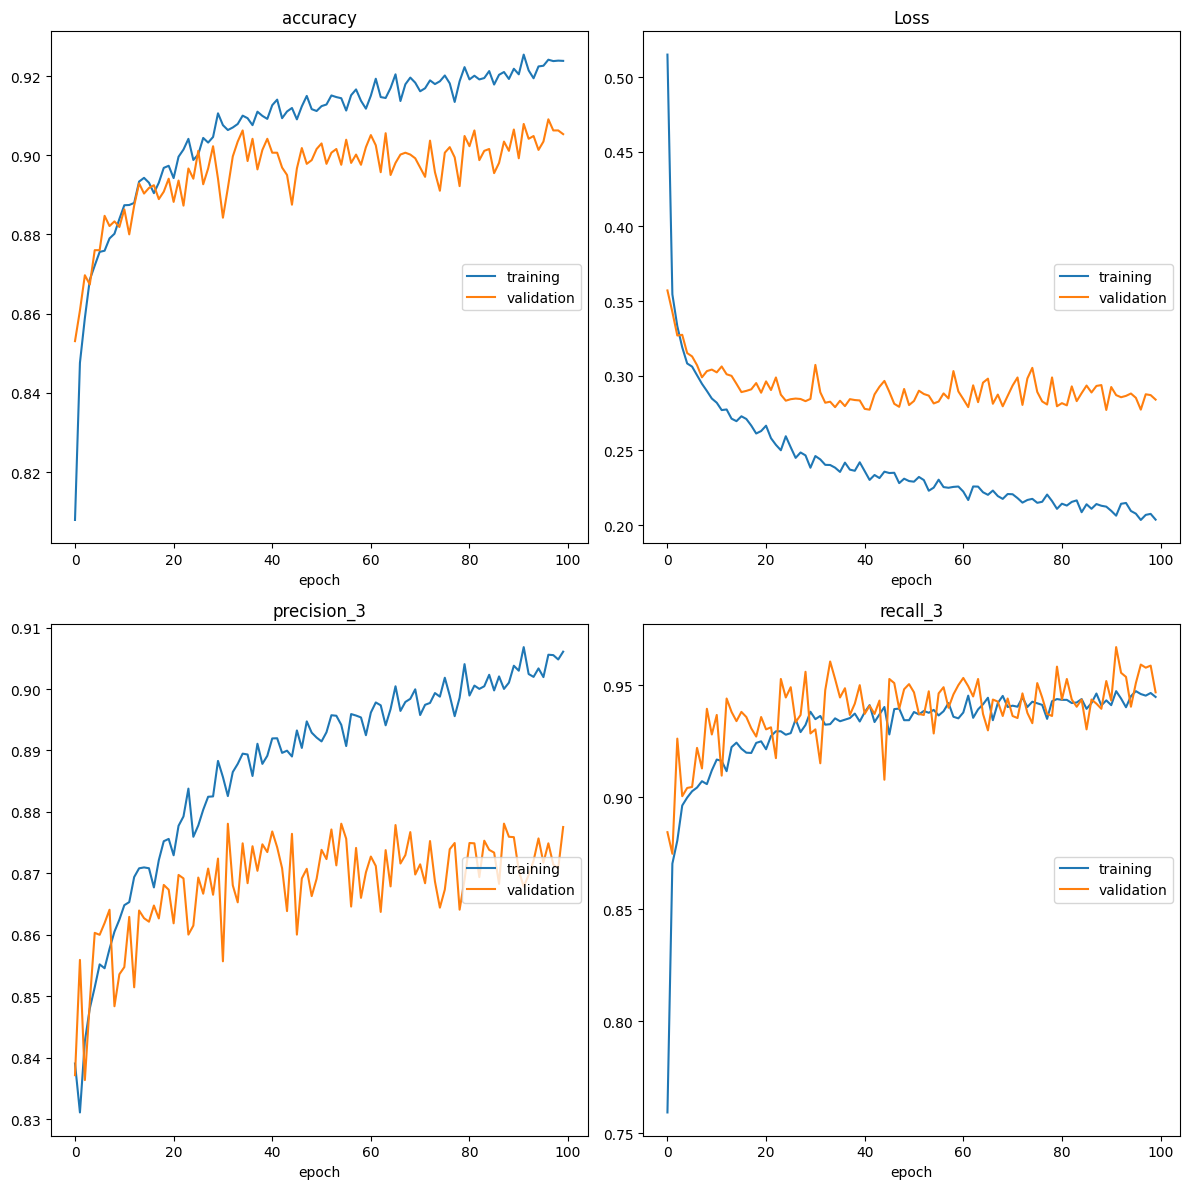

accuracy
	training         	 (min:    0.808, max:    0.925, cur:    0.924)
	validation       	 (min:    0.853, max:    0.909, cur:    0.905)
Loss
	training         	 (min:    0.203, max:    0.515, cur:    0.204)
	validation       	 (min:    0.277, max:    0.357, cur:    0.284)
precision_3
	training         	 (min:    0.831, max:    0.907, cur:    0.906)
	validation       	 (min:    0.836, max:    0.878, cur:    0.878)
recall_3
	training         	 (min:    0.759, max:    0.947, cur:    0.945)
	validation       	 (min:    0.875, max:    0.967, cur:    0.947)
267/267 [==============================] - 2s 8ms/step - loss: 0.2036 - accuracy: 0.9238 - precision_3: 0.9061 - recall_3: 0.9447 - val_loss: 0.2840 - val_accuracy: 0.9053 - val_precision_3: 0.8776 - val_recall_3: 0.9468


In [92]:
model.fit(x_train_std,y_train,epochs=100, batch_size=64,validation_data=(x_test_std,y_test),
          callbacks=[PlotLossesKerasTF()])

Our model is performed well after performed Data imbalanced problem. We got the 92.8% accuracy. That means our model is performed good

In [94]:
# predict our model and classification report

from sklearn.metrics import classification_report
t= model.predict(x_test_std)

134/134 [==============================] - 0s 2ms/step


In [95]:
t1 = []
for i in range(len(t)):
    if t[i] >= 0.5:
        t1.append(1)
    else:
        t1.append(0)

In [96]:
new_pred = pd.Series(t1)  
print(new_pred)

0       0
1       1
2       1
3       1
4       1
       ..
4262    1
4263    1
4264    1
4265    1
4266    0
Length: 4267, dtype: int64


In [97]:
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      2087
           1       0.88      0.95      0.91      2180

    accuracy                           0.91      4267
   macro avg       0.91      0.90      0.90      4267
weighted avg       0.91      0.91      0.91      4267



In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,new_pred)

array([[1799,  288],
       [ 116, 2064]], dtype=int64)

#### 7.Calculate Sensitivity as a metrice

In [99]:


conf = confusion_matrix(y_test,new_pred)

tp,fp,fn,tn = confusion_matrix(y_test,new_pred).ravel()
specificity = tn / (tn+fp)
sensitivity= tp / (tp+fn)
print('TP,FP,FN,TN',tp,fp,fn,tn)
print('sensitivity =', sensitivity)
print('specificity =', specificity)

TP,FP,FN,TN 1799 288 116 2064
sensitivity = 0.9394255874673629
specificity = 0.8775510204081632


#### 8.Calculate area under receiver operating characteristics curve

In [100]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, new_pred)
print('roc_auc_score is',auc_score1)

roc_auc_score is 0.9043959328828968
